/opt/anaconda3/envs/tora/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/tora/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,321 (16.88 KB)

 Trainable params: 4,321 (16.88 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,321 (16.88 KB)

 Trainable params: 4,321 (16.88 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,321 (16.88 KB)

 Trainable params: 4,321 (16.88 KB)

 Non-trainable params: 0 (0.00 B)






scores_adagrad:  0.6763295531272888
scores_rmsprop:  0.5705633759498596
scores_adam:  0.5693039894104004


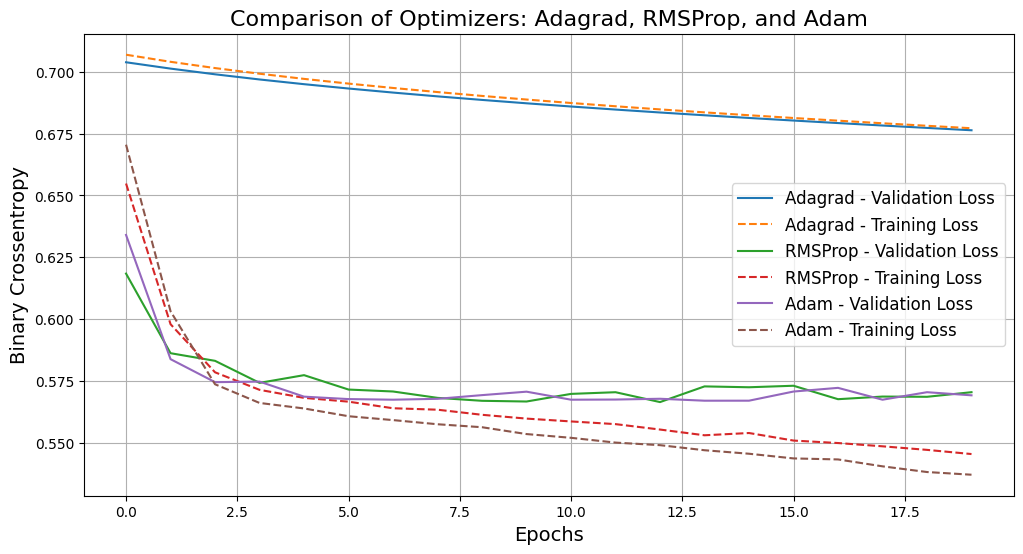

In [1]:
import numpy as np
import tensorflow as tf

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension):
    
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 
    
    return results

'''
1. Adagrad, RMSprop, Adam 최적화 알고리즘을 적용할 하나의 모델을 자유롭게 생성합니다.
'''

def OPT_model(word_num):
    
    model = tf.keras.Sequential([tf.keras.layers.Dense(
        32, input_shape = (word_num , ), activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu') ,
    tf.keras.layers.Dense(1 , activation = 'sigmoid')])
    
    return model

'''
2. 세 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. OPT_model 함수를 이용해 세 모델을 불러옵니다. 
           모두 동일한 모델입니다.
   
   Step02. 세 모델의 손실 함수, 최적화 방법, 
           평가 방법을 설정합니다.
   
   Step03. 세 모델의 구조를 확인하는 코드를 작성합니다.
   
   Step04. 세 모델을 각각 학습시킵니다. 
           세 모델 모두 'epochs'는 20, 'batch_size'는
           500으로 설정합니다.
   
   Step05. 세 모델을 테스트하고 
           binary crossentropy 점수를 출력합니다. 
           셋 중 어느 모델의 성능이 가장 좋은지 확인해보세요.
'''

import matplotlib.pyplot as plt

def plot_history(histories, title="Optimizer Comparison"):
    """
    각 최적화 알고리즘의 학습 및 검증 손실을 시각화합니다.
    :param histories: (dict) 각 알고리즘 이름과 history 객체를 포함한 딕셔너리
    :param title: (str) 그래프 제목
    """
    plt.figure(figsize=(12, 6))
    for name, history in histories.items():
        plt.plot(history.history['val_binary_crossentropy'], label=f"{name} - Validation Loss")
        plt.plot(history.history['binary_crossentropy'], linestyle='--', label=f"{name} - Training Loss")
    
    plt.title(title, fontsize=16)
    plt.xlabel("Epochs", fontsize=14)
    plt.ylabel("Binary Crossentropy", fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

def main():
    
    word_num = 100
    data_num = 25000
    
    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.
    
    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)
    
    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)

    train_labels = np.expand_dims(train_labels, axis=-1)
    test_labels = np.expand_dims(test_labels, axis=-1)
    
    adagrad_model = OPT_model(word_num)  # Adagrad를 사용할 모델입니다.
    rmsprop_model = OPT_model(word_num)  # RMSProp을 사용할 모델입니다.
    adam_model = OPT_model(word_num)     # Adam을 사용할 모델입니다.


    
    adagrad_opt = tf.keras.optimizers.Adagrad(learning_rate= 0.001, epsilon = 0.0000001 , decay = 0.4)
    adagrad_model.compile(loss = 'binary_crossentropy',
    optimizer = adagrad_opt,
    metrics = ['accuracy', 'binary_crossentropy'])
    
    rmsprop_opt = tf.keras.optimizers.RMSprop(learning_rate = 0.001)

    rmsprop_model.compile(loss = 'binary_crossentropy',
    optimizer = rmsprop_opt,
    metrics = ['accuracy', 'binary_crossentropy'])
    
    adam_opt = tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2 = 0.999)
    adam_model.compile(loss = 'binary_crossentropy',
    optimizer = adam_opt,
    metrics = ['accuracy', 'binary_crossentropy']) 
    
    adagrad_model.summary()
    rmsprop_model.summary()
    adam_model.summary()
    
    adagrad_history = adagrad_model.fit(train_data, train_labels,
    epochs = 20 , batch_size = 500 , validation_data= (test_data, test_labels), verbose = 0 )
    print('\n')
    rmsprop_history = rmsprop_model.fit(train_data, train_labels,
    epochs = 20 , batch_size = 500 , validation_data= (test_data, test_labels), verbose = 0 )
    print('\n')
    adam_history = adam_model.fit(train_data, train_labels,
    epochs = 20 , batch_size = 500 , validation_data= (test_data, test_labels), verbose = 0 )
    
    scores_adagrad = adagrad_model.evaluate(test_data, test_labels, verbose = 0)
    scores_rmsprop = rmsprop_model.evaluate(test_data, test_labels, verbose = 0)
    scores_adam = adam_model.evaluate(test_data, test_labels, verbose = 0)
    
    print('\nscores_adagrad: ', scores_adagrad[-1])
    print('scores_rmsprop: ', scores_rmsprop[-1])
    print('scores_adam: ', scores_adam[-1])
    
    return adagrad_history, rmsprop_history, adam_history
    
if __name__ == "__main__":
    adagrad_history, rmsprop_history, adam_history = main()
    
    histories = {
        "Adagrad": adagrad_history,
        "RMSProp": rmsprop_history,
        "Adam": adam_history
    }
    
    plot_history(histories, title="Comparison of Optimizers: Adagrad, RMSProp, and Adam")